<a href="https://colab.research.google.com/github/samarthpatel1289/Mental-Health-Project/blob/master/MentalHealthProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math as m
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import tensorflow as tf

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/Colab Notebooks/Class: Big Data Analytics/MentalHealthProject/catnum_gss.csv"
catnum_gss = pd.read_csv(filepath)
catnum_gss.shape

(64068, 31)

In [ ]:
gss = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Class: Big Data Analytics/MentalHealthProject/Copies/best_gss.csv")
gss

,year,id_,hrs1,hrs2,commute,agewed,sphrs1,sphrs2,sibs,childs,...,whencol,hompop,babies,preteen,teens,adults,unrelat,earnrs,size,happy
0,1972,1,0.0,0.0,0.0,0.0,0.0,0.0,3,0,...,0,1,0.0,0.0,0.0,1,0.0,1.0,72.0,Not too happy
1,1972,2,0.0,0.0,0.0,21.0,0.0,0.0,4,5,...,0,2,0.0,0.0,0.0,2,0.0,0.0,72.0,Not too happy
2,1972,3,0.0,0.0,0.0,20.0,0.0,0.0,5,4,...,0,4,0.0,1.0,1.0,2,0.0,2.0,72.0,Pretty happy
3,1972,4,0.0,0.0,0.0,24.0,0.0,0.0,5,0,...,0,2,0.0,0.0,0.0,2,0.0,2.0,72.0,Not too happy
4,1972,5,0.0,0.0,0.0,22.0,0.0,0.0,2,2,...,0,2,0.0,0.0,0.0,2,0.0,1.0,72.0,Pretty happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64063,2021,4467,0.0,0.0,0.0,0.0,-1.0,-1.0,1,0,...,0,1,-1.0,-1.0,-1.0,1,-1.0,-1.0,-1.0,Not too happy
64064,2021,4468,0.0,50.0,0.0,0.0,-1.0,-1.0,2,2,...,0,1,-1.0,-1.0,-1.0,1,-1.0,-1.0,-1.0,Pretty happy
64065,2021,4469,45.0,0.0,0.0,0.0,-1.0,-1.0,1,2,...,0,1,-1.0,-1.0,-1.0,1,-1.0,-1.0,-1.0,Pretty happy
64066,2021,4470,0.0,0.0,0.0,0.0,-1.0,-1.0,3,2,...,0,1,-1.0,-1.0,-1.0,1,-1.0,-1.0,-1.0,Not too happy


# Feature Engineering

In [ ]:
# helper function to determine correct age
def age_calculator(year, age):
  # some respondents did not specify their age
  # this ensures we do not calculate an incorrect birth year using the apply function
  if age == -1:
    year_born = -1
  elif age != -1:
    year_born = year - age
  return year_born
# Column for the year the respondent was born
gss['year_born'] = gss.apply(lambda row: age_calculator(row.year,row.age), axis=1)

In [ ]:
# reordering columns so happy is at the end
cols = gss.columns.tolist()[:-2]
cols.extend(['year_born','happy'])
gss = gss[cols]
gss

,year,id_,hrs1,hrs2,commute,agewed,sphrs1,sphrs2,sibs,childs,...,hompop,babies,preteen,teens,adults,unrelat,earnrs,size,year_born,happy
0,1972,1,0.0,0.0,0.0,0.0,0.0,0.0,3,0,...,1,0.0,0.0,0.0,1,0.0,1.0,72.0,1949.0,Not too happy
1,1972,2,0.0,0.0,0.0,21.0,0.0,0.0,4,5,...,2,0.0,0.0,0.0,2,0.0,0.0,72.0,1902.0,Not too happy
2,1972,3,0.0,0.0,0.0,20.0,0.0,0.0,5,4,...,4,0.0,1.0,1.0,2,0.0,2.0,72.0,1924.0,Pretty happy
3,1972,4,0.0,0.0,0.0,24.0,0.0,0.0,5,0,...,2,0.0,0.0,0.0,2,0.0,2.0,72.0,1945.0,Not too happy
4,1972,5,0.0,0.0,0.0,22.0,0.0,0.0,2,2,...,2,0.0,0.0,0.0,2,0.0,1.0,72.0,1911.0,Pretty happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64063,2021,4467,0.0,0.0,0.0,0.0,-1.0,-1.0,1,0,...,1,-1.0,-1.0,-1.0,1,-1.0,-1.0,-1.0,2000.0,Not too happy
64064,2021,4468,0.0,50.0,0.0,0.0,-1.0,-1.0,2,2,...,1,-1.0,-1.0,-1.0,1,-1.0,-1.0,-1.0,1992.0,Pretty happy
64065,2021,4469,45.0,0.0,0.0,0.0,-1.0,-1.0,1,2,...,1,-1.0,-1.0,-1.0,1,-1.0,-1.0,-1.0,-1.0,Pretty happy
64066,2021,4470,0.0,0.0,0.0,0.0,-1.0,-1.0,3,2,...,1,-1.0,-1.0,-1.0,1,-1.0,-1.0,-1.0,1953.0,Not too happy


# Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Matrix')

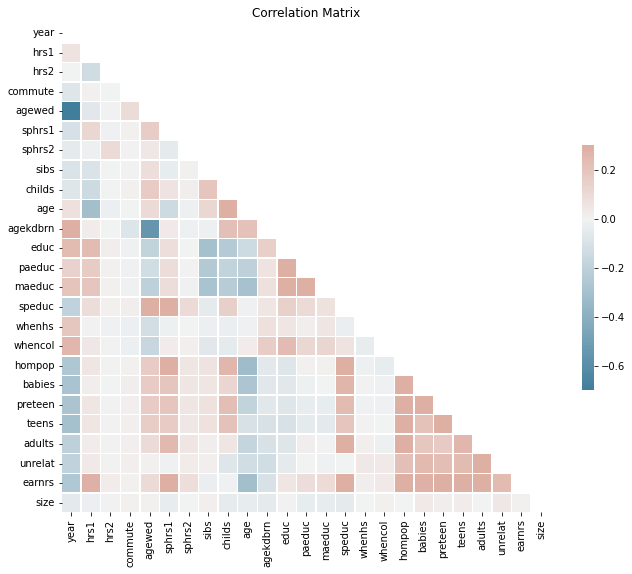

In [ ]:
corr_cols = gss.columns.tolist()[:-1]
corr_cols.remove('id_')
corr_cols.remove('year_born')
corr = gss[corr_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix")

# Imbalanced Data
Here we discover the data is imbalanced with there being only a few cases of unhappy people compared to pretty happy and very happy.

Text(0.5, 0, 'Count')

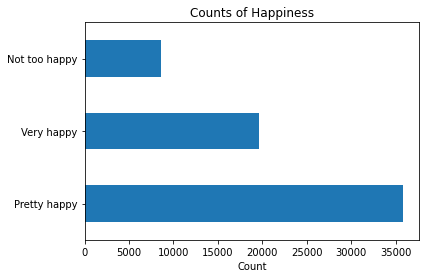

In [ ]:
gss['happy'].value_counts().plot(kind='barh')
plt.title('Counts of Happiness')
plt.xlabel("Count")

Text(0.5, 0, 'Count')

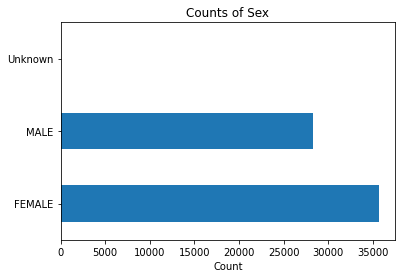

In [ ]:
catnum_gss['sex'].value_counts().plot(kind='barh')
plt.title('Counts of Sex')
plt.xlabel("Count")

Text(0.5, 0, 'Count')

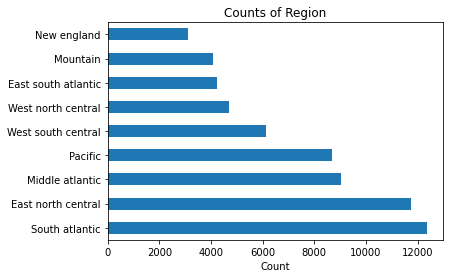

In [ ]:
catnum_gss['region'].value_counts().plot(kind='barh')
plt.title('Counts of Region')
plt.xlabel("Count")

Text(0.5, 0, 'Count')

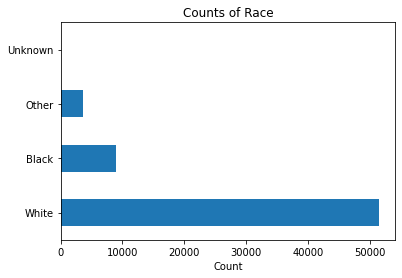

In [ ]:
catnum_gss['race'].value_counts().plot(kind='barh')
plt.title('Counts of Race')
plt.xlabel("Count")

Text(0.5, 0, 'Count')

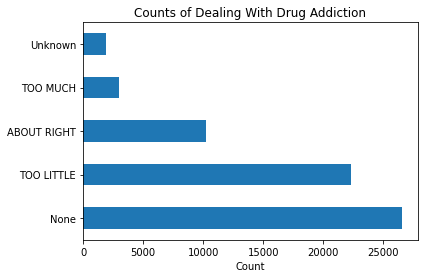

In [ ]:
catnum_gss['natdrug'].value_counts().plot(kind='barh')
plt.title('Counts of Dealing With Drug Addiction')
plt.xlabel("Count")

Text(0.5, 1.0, 'Histogram of Size of Dwelling According To Happiness')

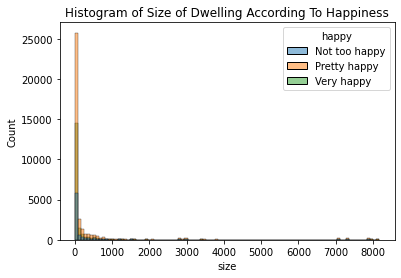

In [ ]:
# Using the full range of size we can see there are outliers
sns.histplot(data=gss, x="size", hue="happy", bins = 100)
plt.title("Histogram of Size of Dwelling According To Happiness")

Text(0.5, 1.0, 'Size of Dwelling According To Happiness (Outliers Removed)')

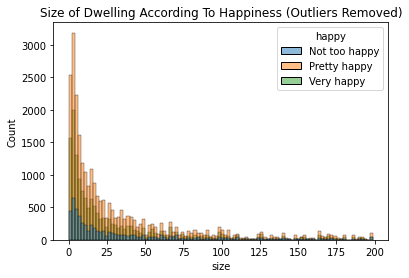

In [ ]:
# Using a temporary df to remove outliers
temp_df = gss[(gss['size'] >= 0) & (gss['size'] <= 200)]
sns.histplot(data=temp_df, x="size", hue="happy", bins = 100)
plt.title("Size of Dwelling According To Happiness (Outliers Removed)")

# K-Means Clustering

# Perform K-Means Clustering
We perform a K-Means Clustering algorithm 25 times on the dataset to determine the optimal number of clusters to choose. We decide the optimal number of clusters using the elbow method of choosing a point on the graph where we observe diminishing returns on increasing the number of clusters.

In [ ]:
# GSS columns without Happy and ID columns
X_cols = corr_cols

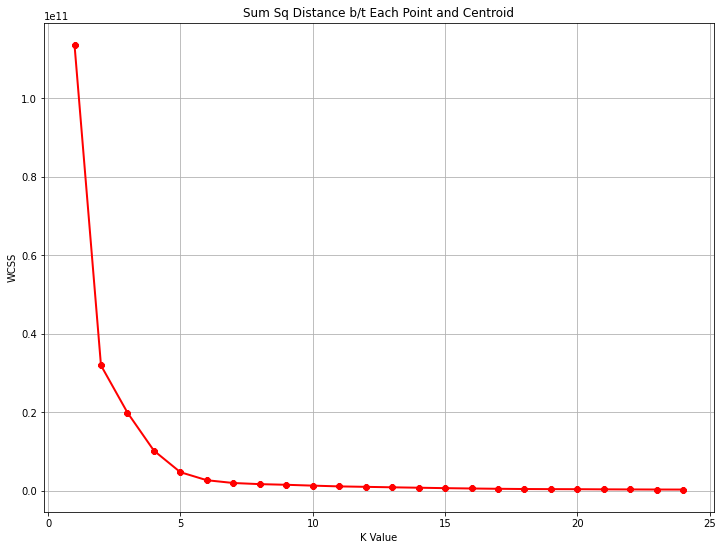

CPU times: user 1min 6s, sys: 23.8 s, total: 1min 30s
Wall time: 48.9 s


In [ ]:
%%time
# Within-Cluster Sum Squared
# sum of squared distance between each point and the centroid in a cluster
wcss = []
for k in range(1,25):
  kmeans = KMeans(n_clusters=k,init="k-means++").fit(gss[X_cols])
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(range(1,25),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title('Sum Sq Distance b/t Each Point and Centroid')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


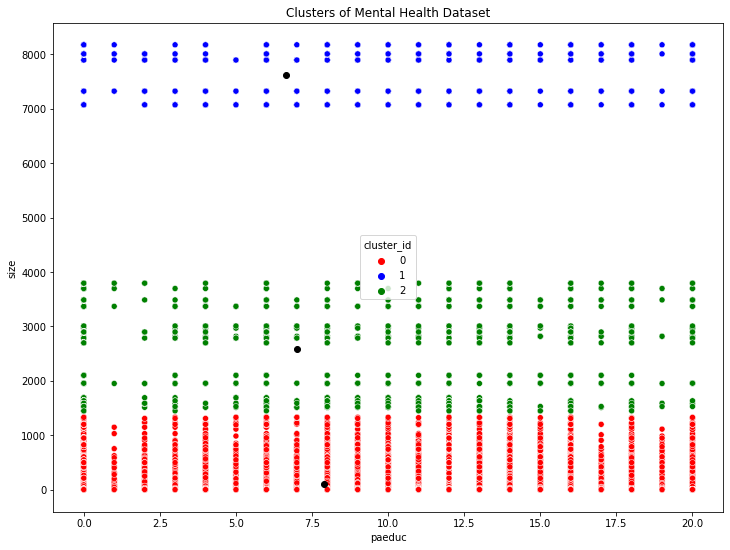

In [ ]:
X_df = gss[X_cols]

kmeans = KMeans(n_clusters=3).fit(X_df)
X_df['cluster_id'] = kmeans.labels_
X_cols.append('cluster_id')
color_map = {0: 'r',
             1: 'b',
             2: 'g'}

col_1 = X_cols.index('paeduc')
col_2 = X_cols.index('size')

# Show clusters and their centers
plt.figure(figsize=(12,9))
sns.scatterplot(data=X_df, x= X_cols[col_1], y= X_cols[col_2], hue='cluster_id', palette=color_map)
plt.scatter(x=kmeans.cluster_centers_[:,col_1], y=kmeans.cluster_centers_[:,col_2], c='black')
plt.title("Clusters of Mental Health Dataset")
plt.xlabel(X_cols[col_1])
plt.ylabel(X_cols[col_2])
plt.show()

# Principal Component Analysis
We perform PCA to visualize this high dimensional data in a 2D space.
First we scale the data using a min-max technique. Then we group the scaled data by cluster ID and happiness to get an idea of the happiness of the people in each cluster.

In [ ]:
# copy the data
df_min_max_scaled = X_df.copy()
#df_min_max_scaled.drop(columns='cluster_id', inplace=True)
# apply normalization techniques
for column in df_min_max_scaled.columns:
	df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	

In [ ]:
temp_df = pd.concat([df_min_max_scaled, gss['happy']], axis=1)
temp_df = temp_df.groupby(['cluster_id','happy'])['happy'].count().rename(index='Counts')
# calculate percentage of Happy, Not too happy, and Pretty happy in each cluster
df_clusterperc = temp_df.groupby(level=0).transform(lambda x: (x / x.sum()).round(2)).rename(index='percentage of cluster')
# calculate percentage of Happy, Not too happy, and Pretty happy overall
df_dataperc = temp_df.transform(lambda x: (x / x.sum()).round(2)).rename(index='percentage of data')
# new df
temp_df = pd.concat([temp_df, df_clusterperc, df_dataperc], axis=1)
temp_df

Counts  percentage of cluster  percentage of data
cluster_id happy                                                           
0.0        Not too happy    7952                   0.13                0.12
           Pretty happy    33883                   0.56                0.53
           Very happy      18702                   0.31                0.29
0.5        Not too happy     289                   0.19                0.00
           Pretty happy      867                   0.57                0.01
           Very happy        358                   0.24                0.01
1.0        Not too happy     350                   0.17                0.01
           Pretty happy     1121                   0.56                0.02
           Very happy        546                   0.27                0.01

### Visualizing the results of grouping the data.
We create a pie chart for each cluster to visualize the proportion of responses to the happiness question.

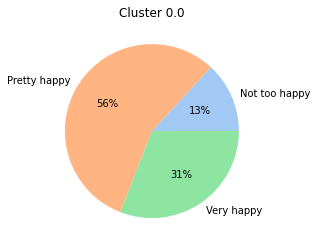

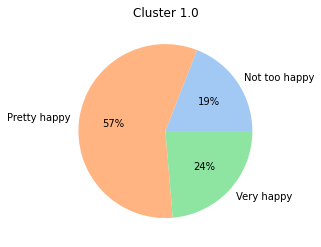

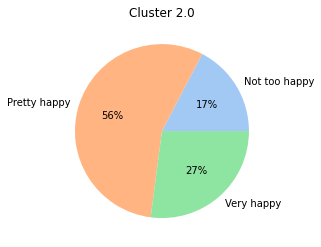

In [ ]:
viz_df = temp_df.reset_index(level=[0,1])
colors = sns.color_palette('pastel')[0:3]
#create pie chart
for i in range(3):
  c = i/2
  cluster_i = viz_df[viz_df['cluster_id'] == c]
  plt.pie(cluster_i['Counts'],labels=cluster_i['happy'], colors=colors,autopct='%.0f%%')
  plt.title("Cluster {}".format(2*c))
  plt.show()

### Comparing Results
We compare the cluster proportions with the proportion of the response to the happiness question across the entire dataset.

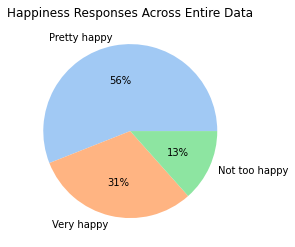

In [ ]:
plt.pie(gss['happy'].value_counts(),labels=gss['happy'].value_counts().index,colors=colors, autopct='%.0f%%')
plt.title("Happiness Responses Across Entire Data")
plt.show()

In [ ]:
# Create a PCA model to reduce our data to 2 dimensions for visualisation
X_df = df_min_max_scaled
pca = PCA(n_components=2).fit(X_df)

# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10).fit(X_df)

# Determine which clusters each data point belongs to:
clusters = kmeans.predict(X_df)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_df)

# Principal Component Feature Importance
The eigenvalues from pca.components_ represent how much influence a feature column from our data has on the resulting principal components. By putting each principal component into its' own dataframe we can sort the eigenvalues from greatest to least and visualize the results.

Text(0.5, 0, 'Eigenvalue')

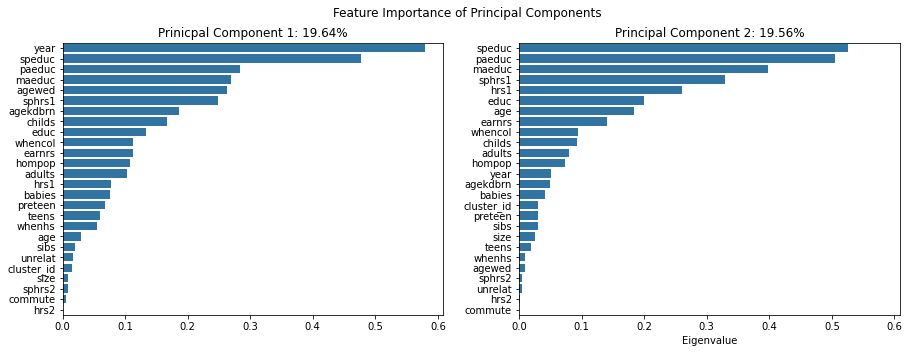

In [ ]:
eigenvalues = abs(pca.components_)

percent1 = round(pca.explained_variance_ratio_[0]*100, 2)
percent2 = round(pca.explained_variance_ratio_[1]*100, 2)

d = {'Feature': X_df.columns.tolist(),
    'PC1': eigenvalues[0].tolist(),
     'PC2': eigenvalues[1].tolist()}

df = pd.DataFrame(d)
df_pc1 = df[['Feature','PC1']].sort_values('PC1', ascending=False)
df_pc2 = df[['Feature','PC2']].sort_values('PC2', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False, sharex=False)
fig.suptitle('Feature Importance of Principal Components')


sns.barplot(ax=axes[0], y=df_pc1['Feature'].tolist(), x=df_pc1['PC1'].values, color='C0')
axes[0].set_title("Prinicpal Component 1: {}%".format(percent1))

sns.barplot(ax=axes[1], y=df_pc2['Feature'].tolist(), x=df_pc2['PC2'].values, color='C0')
axes[1].set_title("Principal Component 2: {}%".format(percent2))


# Biplot of the Principal Components.
The biplot visualizes the response to happiness in 2 principal components and can be interpreted as such.
* The orientation (direction) of the vector, with respect to the principal component space, in particular, its angle with the principal component axes: the more parallel to a principal component axis is a vector, the more it contributes only to that PC.

* The length in the space; the longer the vector, the more variability of this variable is represented by the two displayed principal components; short vectors are thus better represented in other dimension.

* The angles between vectors of different variables show their correlation in this space: small angles represent high positive correlation, right angles represent lack of correlation, opposite angles represent high negative correlation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


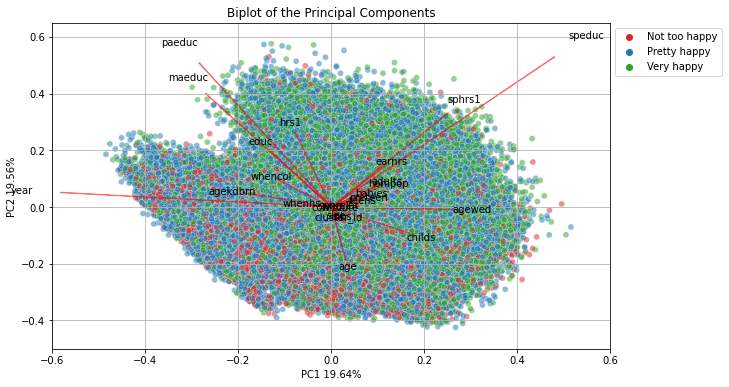

In [ ]:
# Using happiness to determine colors
y = gss['happy'].values
color_map = {"Not too happy": 'tab:red',
             "Pretty happy": 'tab:blue',
             "Very happy": 'tab:green'}

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(10,6))
    sns.scatterplot(xs*scalex, y=ys*scaley, hue=y, palette=color_map, alpha = 0.5)
    plt.xlim(-.6,.6)
    plt.ylim(-.5,.65)
    percent1 = round(pca.explained_variance_ratio_[0]*100, 2)
    percent2 = round(pca.explained_variance_ratio_[1]*100, 2)
    plt.xlabel("PC1 {}%".format(percent1))
    plt.ylabel("PC2 {}%".format(percent2))
    plt.grid()
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')

labels = X_df.columns.tolist()
#Call the function. Use only the 2 PCs.
myplot(X_reduced[:,0:2],np.transpose(pca.components_[0:2, :]), labels)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.title("Biplot of the Principal Components")
plt.show()

In [ ]:
# Convert to a data frame
gss_reduced_df = pd.DataFrame(X_reduced, index=X_df.index, columns=['PC1','PC2'])
gss_reduced_df['cluster'] = clusters
gss_reduced_df.head()

,PC1,PC2,cluster
0,0.122522,-0.358051,2
1,0.559150,-0.162321,2
2,0.545594,-0.065705,2
3,0.446082,0.562940,0
4,0.495984,-0.073643,2


In [ ]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# helper function
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

# Visualzing the Clusters
Here we visualize the clusters themselves in the principle components

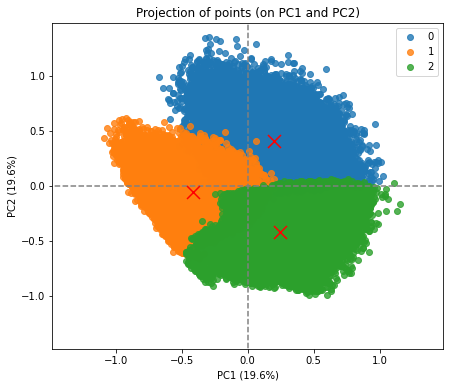

In [ ]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# Parallel Coordinates Plot
Here we create a parallel coordinates plot and can be interpreted as such:
* Parallel lines indicate a positive relationship 
* Crossing lines (X shapes) indicate a negative association
* Line thickness correlates to number of observations in that bin
* Horizontal axis represents the features
* Vertical axis represents the values the data points take in the feature

Since the data is normalized, the values range from 0 to 1.

CPU times: user 2min 56s, sys: 8.58 s, total: 3min 5s
Wall time: 3min 3s


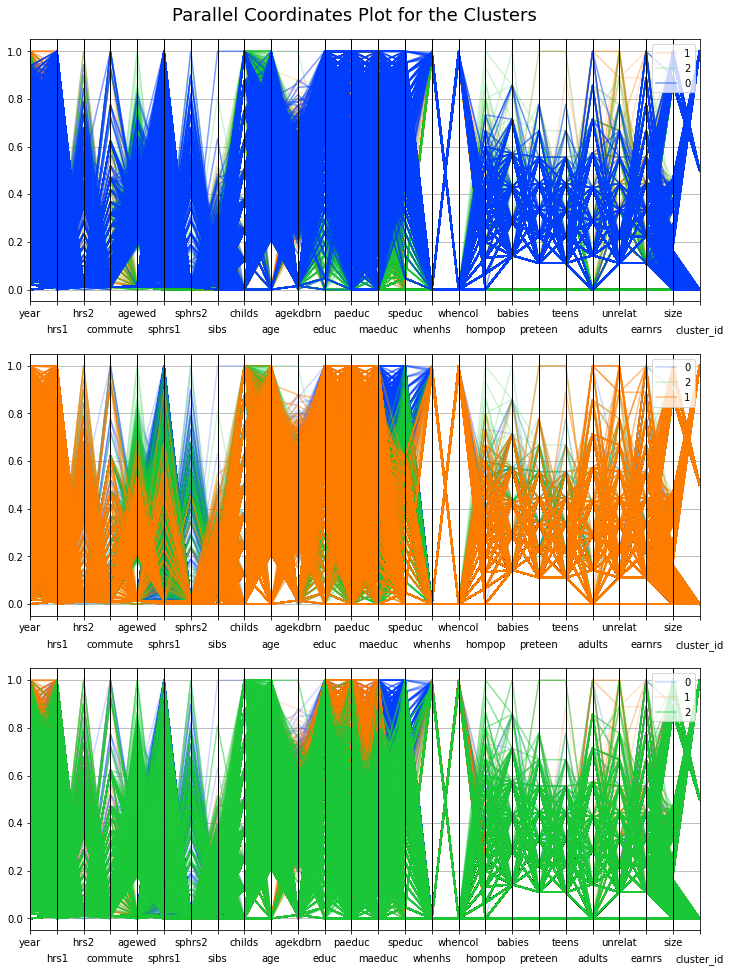

In [ ]:
%%time
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_df, index=X_df.index, columns=X_df.columns)
X_clustered["cluster"] = clusters

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

palette = sns.color_palette("bright", 10)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)  

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 3)

# Centroids Parallel Plot
The above parallel plot contains many data points so we use the centroids, which are representative of the clusters, to get a better understanding of the data.

CPU times: user 95.2 ms, sys: 56.7 ms, total: 152 ms
Wall time: 93 ms


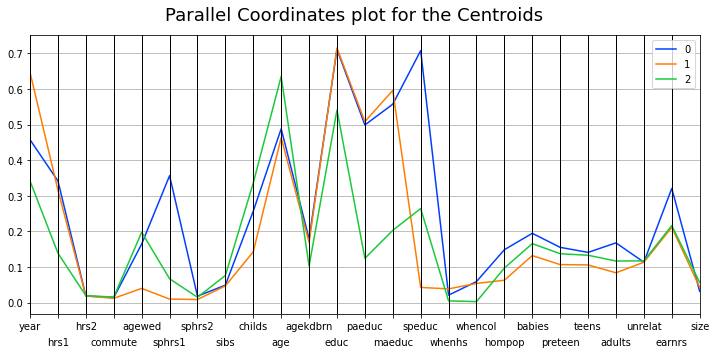

In [ ]:
%%time
# Create a data frame containing our centroids
cols = X_df.columns.tolist()
cols.remove('cluster')
cols.remove('cluster_id')

centroids = pd.DataFrame(kmeans.cluster_centers_[:,:-1], columns=cols)
centroids['cluster'] = centroids.index

def display_parallel_coordinates_centroids(df):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)

display_parallel_coordinates_centroids(centroids)
# parallel lines indicate a positive relationship while lots of crossing lines (X shapes) indicate a negative association
# Clusters all have positive relationships with size

# Misleading Data
Even though the survey data contains an identification number for each respondent, the identification number is not unique as we can see in the following table. The age of the respondent varies wildly from year to year so we can conclude the id_ column does not keep track of individuals rendering the column useless.

In [ ]:
gss[gss['id_'] == 2][['year','id_','age']].head()

,year,id_,age
1,1972,2,70.0
1607,1973,2,51.0
3107,1974,2,41.0
4587,1975,2,20.0
6072,1976,2,51.0


# Exploring Happiness For Different Generations
This next series of code block explores how different generations responded when asked if they were happy.
It appears older generations responded they were happier more often than younger generations.

In [ ]:
# a helper function to determine what generation respondents were born in
def generation_finder(x):
  if x == -1:
    generation = "Unknown"
  elif (x >= 1883) and (x <= 1900):
    generation = "The Lost Generation"
  elif (x>1900) and (x<=1927):
    generation = "The Greatest Generation"
  elif (x>1927) and (x<=1945):
    generation = "The Silent Generation"
  elif (x>1945) and (x<=1964):
    generation = "Baby Boomers"
  elif (x>1964) and (x<=1980):
    generation = "Generation X"
  elif (x>1980) and (x<=1996):
    generation = "Millenial"
  elif (x>1996) and (x<=2012):
    generation = "Generation Z"
  return generation

gss['Generation'] = gss['year_born'].apply(lambda row: generation_finder(row))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Counts of Generations')

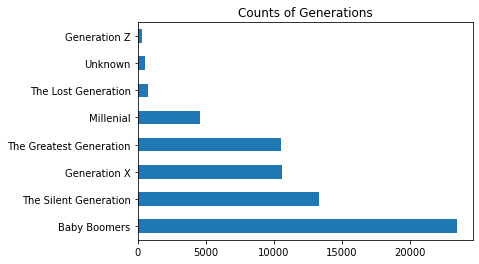

In [ ]:
gss['Generation'].value_counts().plot(kind='barh')
plt.title('Counts of Generations')

In [ ]:
gen_df = pd.concat([df_min_max_scaled,gss['Generation'], gss['happy']], axis=1)
gen_df_v1 = gen_df.groupby(['Generation','happy'])['happy'].count().rename(index='Counts')

# # calculate percentage of Happy, Not too happy, and Pretty happy in each Generation
df_genperc = gen_df_v1.groupby(level=0).transform(lambda x: (x/x.sum()).round(2)).rename(index='Percentage of Generation')

# calculate percentage of Happy, Not too happy, and Pretty happy overall
df_datagen = gen_df_v1.transform(lambda x: (x / x.sum()).round(2)).rename(index='percentage of data')
# new df
gen_df_v2 = pd.concat([gen_df_v1, df_genperc, df_datagen], axis=1)
gen_df_v2

Counts  Percentage of Generation  \
Generation              happy                                             
Baby Boomers            Not too happy    3089                      0.13   
                        Pretty happy    13553                      0.58   
                        Very happy       6779                      0.29   
Generation X            Not too happy    1404                      0.13   
                        Pretty happy     6198                      0.59   
                        Very happy       2971                      0.28   
Generation Z            Not too happy      84                      0.29   
                        Pretty happy      153                      0.53   
                        Very happy         51                      0.18   
Millenial               Not too happy     717                      0.16   
                        Pretty happy     2664                      0.58   
                        Very happy       1184                      0.26   
The Greatest Generation Not too happy    1382                      0.13   
                        Pretty happy     5386                      0.51   
                        Very happy       3783                      0.36   
The Lost Generation     Not too happy     125                      0.16   
                        Pretty happy      388                      0.49   
                        Very happy        280                      0.35   
The Silent Generation   Not too happy    1686                      0.13   
                        Pretty happy     7244                      0.54   
                        Very happy       4422                      0.33   
Unknown                 Not too happy     104                      0.20   
                        Pretty happy      285                      0.54   
                        Very happy        136                      0.26   

                                       percentage of data  
Generation              happy                              
Baby Boomers            Not too happy                0.05  
                        Pretty happy                 0.21  
                        Very happy                   0.11  
Generation X            Not too happy                0.02  
                        Pretty happy                 0.10  
                        Very happy                   0.05  
Generation Z            Not too happy                0.00  
                        Pretty happy                 0.00  
                        Very happy                   0.00  
Millenial               Not too happy                0.01  
                        Pretty happy                 0.04  
                        Very happy                   0.02  
The Greatest Generation Not too happy                0.02  
                        Pretty happy                 0.08  
                        Very happy                   0.06  
The Lost Generation     Not too happy                0.00  
                        Pretty happy                 0.01  
                        Very happy                   0.00  
The Silent Generation   Not too happy                0.03  
                        Pretty happy                 0.11  
                        Very happy                   0.07  
Unknown                 Not too happy                0.00  
                        Pretty happy                 0.00  
                        Very happy                   0.00

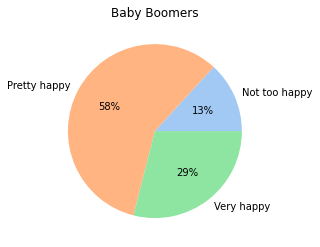

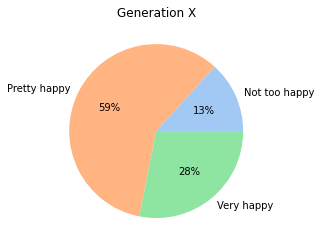

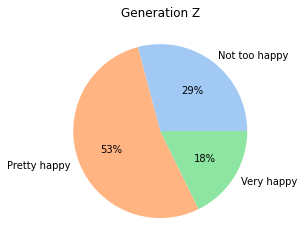

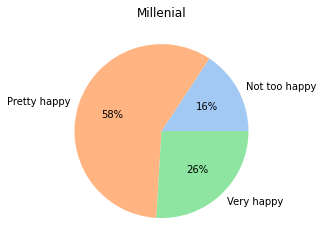

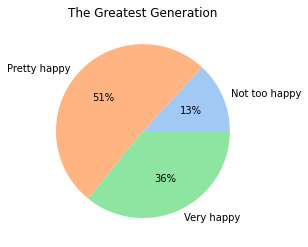

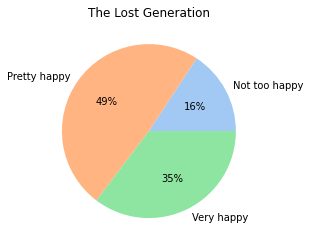

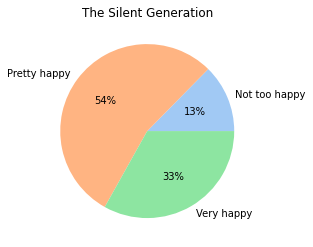

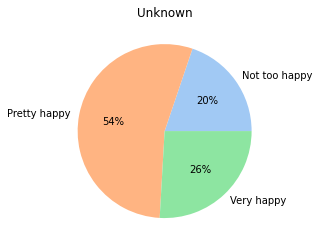

In [ ]:
gen_viz_df = gen_df_v2.reset_index(level=[0,1])
colors = sns.color_palette('pastel')[0:3]
gens = np.unique(gss['Generation'].tolist())
num_gens = len(gens)
#create pie chart
for i in range(num_gens):
  gen_i = gen_viz_df[gen_viz_df['Generation'] == gens[i]]
  plt.pie(gen_i['Counts'],labels=gen_i['happy'], colors=colors,autopct='%.0f%%')
  plt.title("{}".format(gens[i]))
  plt.show()

# Creating Average Dataframe
Here we group the GSS data by year, generation, and happiness so we can calculate the average values for the numerical columns. For example, we calculate the average hours worked for Baby Boomers who indicated they were happy in the year 1972. We extrapolate this idea for every year, every generation, for every happiness response for every column.

In [ ]:
gen_year_df = gss[['year','Generation','happy']]
# Count number of responses for a given year for a given generation for a given happiness response
gen_year_df_v1 = gen_year_df.groupby(['year','Generation','happy'])['happy'].count().rename(index='Counts')

# calculate percentage of Happy, Not too happy, and Pretty happy in each year for each generation
df_genyr_perc = gen_year_df_v1.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(2)).rename(index='% of Gen Response')

# Calculate column averages for each year for each generation for each happiness response
all_cols = gss.columns.tolist()
remove_list = ['year', 'Generation', 'happy', 'id_', 'year_born']
avg_list = [i for i in all_cols if i not in remove_list]
avg_dfs = []
for col in avg_list:
  columns = ['year','Generation', 'happy', col]
  avg_df = gss[columns].groupby(columns[:-1])[columns[-1]].mean().rename(index="Avg {}".format(col))
  avg_dfs.append(avg_df)
avg_dfs.extend([gen_year_df_v1, df_genyr_perc])
all_avg_dfs = pd.concat(avg_dfs, axis=1).reset_index(level=[0,1,2])
all_avg_dfs

,year,Generation,happy,Avg hrs1,Avg hrs2,Avg commute,Avg agewed,Avg sphrs1,Avg sphrs2,Avg sibs,...,Avg hompop,Avg babies,Avg preteen,Avg teens,Avg adults,Avg unrelat,Avg earnrs,Avg size,Counts,% of Gen Response
0,1972,Baby Boomers,Not too happy,0.000000,0.000000,0.0,8.000000,0.0,0.0,3.729167,...,4.520833,0.666667,0.395833,0.541667,2.916667,0.312500,2.145833,696.750000,48,0.17
1,1972,Baby Boomers,Pretty happy,0.000000,0.000000,0.0,9.638554,0.0,0.0,3.367470,...,3.831325,0.632530,0.265060,0.325301,2.578313,0.228916,1.759036,608.475904,166,0.58
2,1972,Baby Boomers,Very happy,0.000000,0.000000,0.0,13.520548,0.0,0.0,3.465753,...,3.602740,0.739726,0.178082,0.205479,2.479452,0.205479,1.739726,451.794521,73,0.25
3,1972,The Greatest Generation,Not too happy,0.000000,0.000000,0.0,22.864407,0.0,0.0,3.957627,...,3.288136,0.118644,0.313559,0.423729,2.432203,0.033898,1.449153,745.237288,118,0.17
4,1972,The Greatest Generation,Pretty happy,0.000000,0.000000,0.0,21.684058,0.0,0.0,4.171014,...,2.968116,0.075362,0.240580,0.376812,2.275362,0.034783,1.513043,494.875362,345,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,2021,The Silent Generation,Pretty happy,3.038674,0.000000,0.0,0.000000,-1.0,-1.0,3.066298,...,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,181,0.56
529,2021,The Silent Generation,Very happy,3.772727,0.000000,0.0,0.000000,-1.0,-1.0,3.545455,...,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,66,0.20
530,2021,Unknown,Not too happy,16.242857,0.642857,0.0,0.000000,-1.0,-1.0,3.071429,...,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,70,0.21
531,2021,Unknown,Pretty happy,22.856410,0.748718,0.0,0.000000,-1.0,-1.0,3.328205,...,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,195,0.59


# Visualizing all_avg_dfs As Animated Bubble Chart
Here we take the newly created all_avg_dfs and visualize the results as an animated bubble chart using plotly. Each frame shows us a different year and each color shows us the happiness category of each generation. The size of the bubbles represent the percentage of respondents. Hovering your mouse over the bubbles will yield the exact generation and values.

# Average hours vs Average Dwelling Size
Using the average number of hours usually worked in a week and average dwelling size, we can see:
* When the average number of hours worked in a week increases so too does unhappiness.
* Surprisingly, many times when the size of the dwelling crosses a threshold of around 1000 the unhappiness among respondents increases.

In [ ]:
discrete_colors = ["red", "blue", "green"]
unknown_removed = all_avg_dfs[all_avg_dfs['Generation'] != 'Unknown']
df = px.data.gapminder()
fig = px.scatter(unknown_removed, x="Avg hrs2", y="Avg size", animation_frame="year", animation_group="Generation",
           size="% of Gen Response", color="happy", hover_name = "Generation", color_discrete_sequence=discrete_colors,
           log_x=False, size_max=50, range_x=[-1,10], range_y=[-1, 3000])

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 875
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 875
pio.show(fig)

# Education As A Factor of Happiness
Here we see that those who indicate they are not too happy tend to have fathers and spouses with a lower level of education than those who indicate they are very happy.

In [ ]:
discrete_colors = ["red", "blue", "green"]
# removing uknown generations from the analysis
unknown_removed = all_avg_dfs[(all_avg_dfs['Generation'] != 'Unknown')]

df = px.data.gapminder()
fig = px.scatter(unknown_removed, x="Avg speduc", y="Avg paeduc", animation_frame="year", animation_group="Generation",
           size="% of Gen Response", color="happy", hover_name = "Generation", color_discrete_sequence=discrete_colors,
           log_x=False, size_max=50, range_x=[-5,25], range_y=[-1, 20])
#range_x=[-100,3000], range_y=[-5, 30]
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 875
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 875
pio.show(fig)

# Spouses Education vs Spouses Work Hours
Here we can see respondents whose spouse have a lower education and a lower number of working hours tend to respond they are not too happy.

In [ ]:
discrete_colors = ["red", "blue", "green"]
# removing uknown generations from the analysis
unknown_removed = all_avg_dfs[(all_avg_dfs['Generation'] != 'Unknown')]

# animated bubble chart
df = px.data.gapminder()
fig = px.scatter(unknown_removed, x="Avg speduc", y="Avg sphrs1", animation_frame="year", animation_group="Generation",
           size="% of Gen Response", color="happy", hover_name = "Generation", color_discrete_sequence=discrete_colors,
           log_x=False, size_max=50, range_x=[-1,15], range_y=[-5, 35])

# frame rate for bubble chart
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 875
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 875
pio.show(fig)

# Spouse's Education vs Average Generation's Age
Here we find something interesting. When respondents are young, typically in their early 20's, their spouse's education level does not contribute largely to their happiness. However, between resondent's 30's and up until their late 70's/early 80's the lower the education level of their spouse the more the respondent is likely to indicate they are not happy. Then once respondent's age past their 80's their spouse's education level plays a smaller role in their level of happiness.

In [ ]:
discrete_colors = ["red", "blue", "green"]
# removing uknown generations from the analysis
unknown_removed = all_avg_dfs[(all_avg_dfs['Generation'] != 'Unknown')]

# animated bubble chart
df = px.data.gapminder()
fig = px.scatter(unknown_removed, x="Avg age", y="Avg speduc", animation_frame="year", animation_group="Generation",
           size="% of Gen Response", color="happy", hover_name = "Generation", color_discrete_sequence=discrete_colors,
           log_x=False, size_max=50, range_x=[10,100], range_y=[-1, 15])

# frame rate for bubble chart
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 875
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 875
pio.show(fig)

# Education vs Spouse's Education
Here we can see those who indicate they are not too happy tend to have lower education levels and their spouse tend to have lower education levels.

In [ ]:
discrete_colors = ["red", "blue", "green"]
# removing uknown generations from the analysis
unknown_removed = all_avg_dfs[(all_avg_dfs['Generation'] != 'Unknown')]

# animated bubble chart
df = px.data.gapminder()
fig = px.scatter(unknown_removed, x="Avg educ", y="Avg speduc", animation_frame="year", animation_group="Generation",
           size="% of Gen Response", color="happy", hover_name = "Generation", color_discrete_sequence=discrete_colors,
           log_x=False, size_max=50, range_x=[-1,20], range_y=[-1, 15])

# frame rate for bubble chart
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 875
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 875
pio.show(fig)

# Time Series Plots
Here we create 3 line graphs showcasing the percentage of respondents who answered the happiness question with one of the three answers broken down by generation.
Here we can see the following trends:
* As time moves on the percentage of people who answer with "Very Happy" declines for every generation.
* As time moves on the percentage of people who answer "Not too happy" increases for every generation.

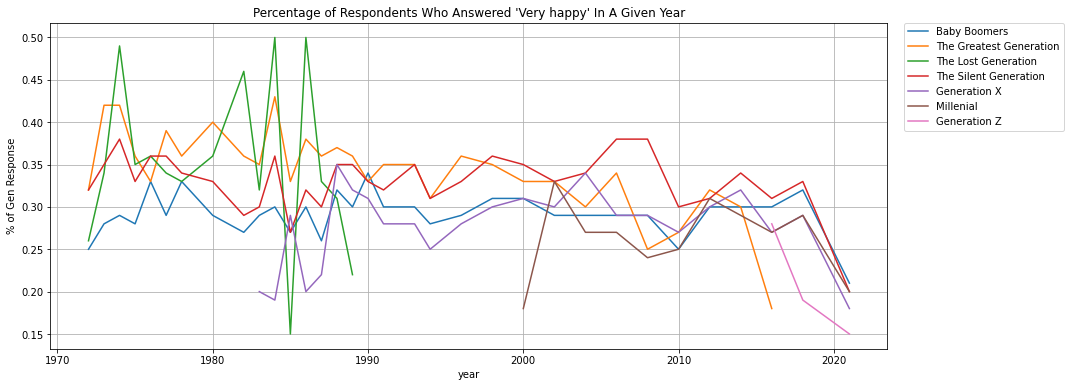

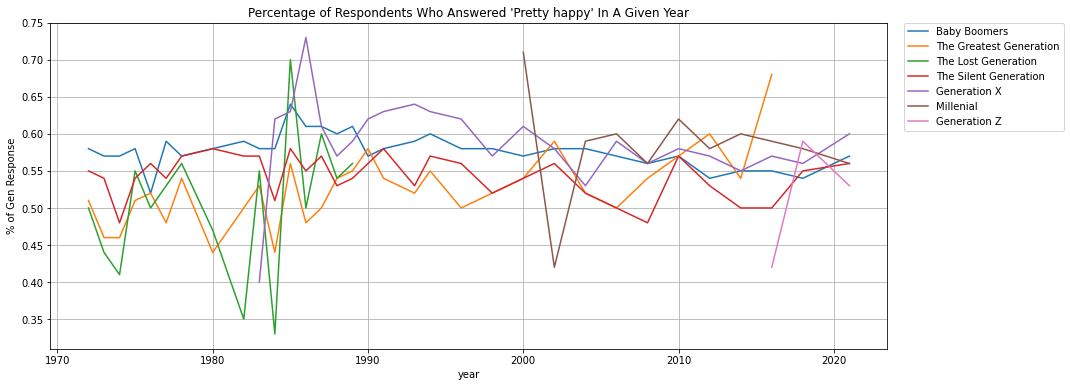

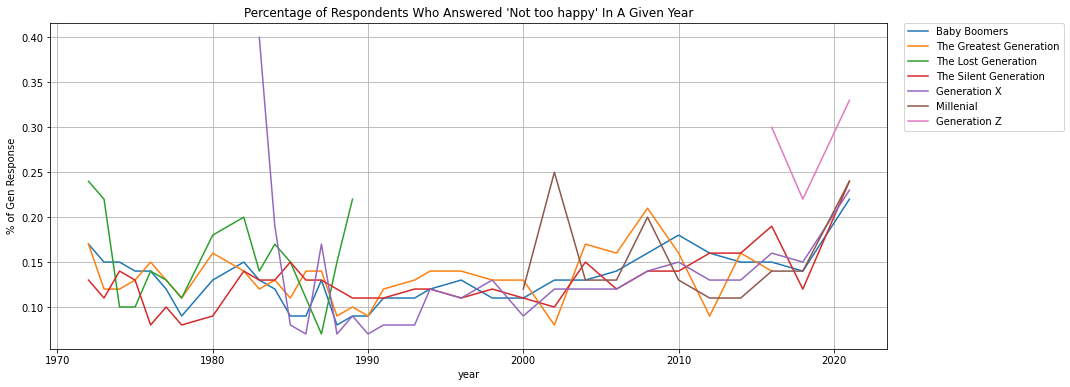

In [ ]:
happy = ['Very happy', 'Pretty happy', 'Not too happy']
genyr_perc_viz_df = df_genyr_perc.reset_index(level=[0,1,2])
for x in happy:
  happy_genyr = genyr_perc_viz_df[(genyr_perc_viz_df['happy'] == x) & (genyr_perc_viz_df['Generation'] != "Unknown")]
  plt.figure(figsize=(15,6))
  sns.lineplot(data=happy_genyr, x="year", y="% of Gen Response", hue="Generation")
  plt.title("Percentage of Respondents Who Answered '{}' In A Given Year".format(x))
  plt.grid()
  plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Time Series Plots
Here we create 3 line graphs showcasing the percentage of respondents who answered the happiness question with one of the three answers broken down by Gender.
Here we can see the following trends:
* As time moves on the percentage of people who answer with "Very Happy" declines for males and females.
* As time moves on the percentage of people who answer "Pretty happy" increases, however, men and women begin to diverge in their answers in the final few years.
* As time moves on the percentage of people who answer "Not too happy" increases for males and females.

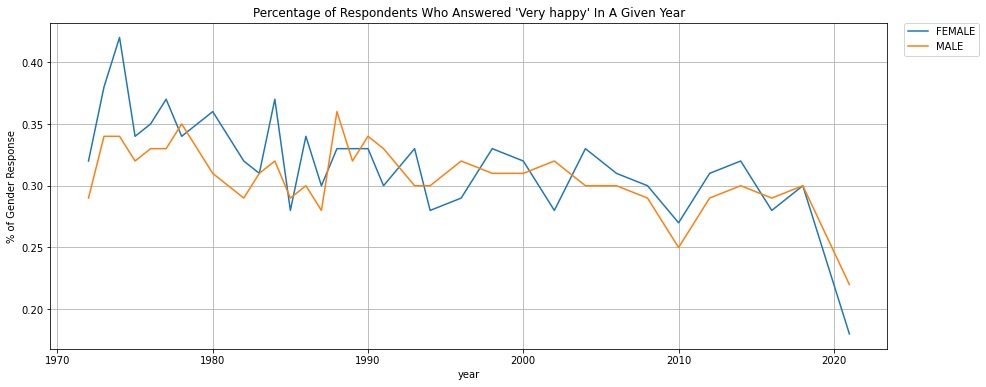

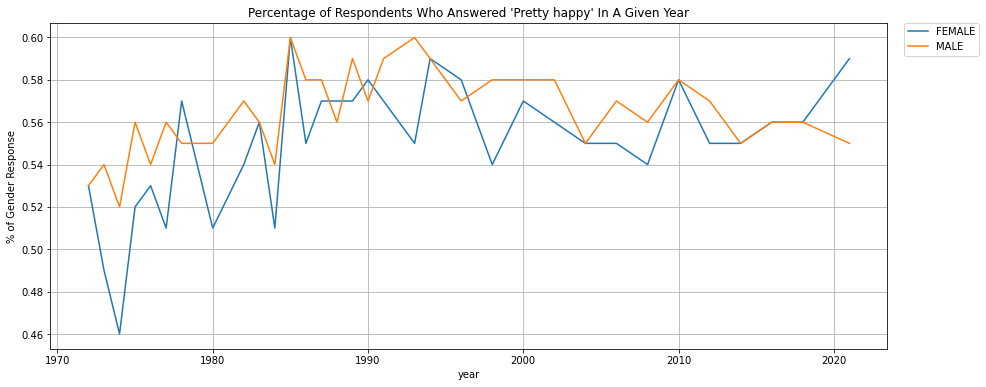

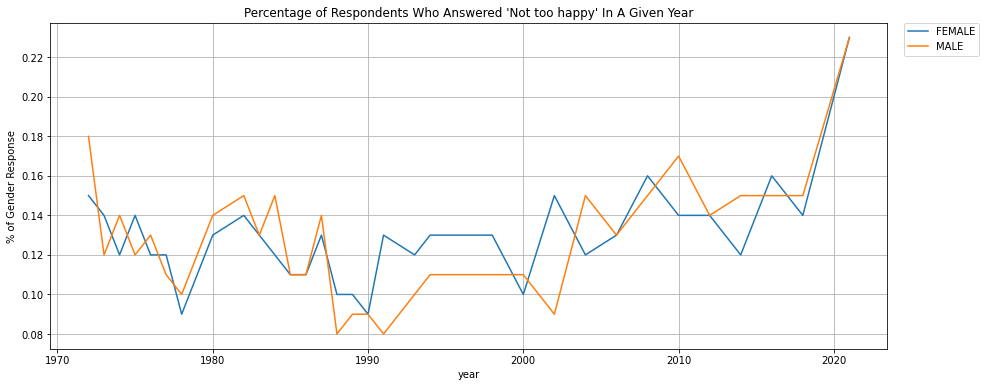

In [ ]:
yr_sx_df = catnum_gss[['year','sex','happy']]
# Count number of responses for a given year for a given generation for a given happiness response
yr_sx_df_v1 = yr_sx_df.groupby(['year','sex','happy'])['happy'].count().rename(index='Counts')

# calculate percentage of Happy, Not too happy, and Pretty happy in each year for each generation
df_yrsx_perc = yr_sx_df_v1.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(2)).rename(index='% of Gender Response')
happy = ['Very happy', 'Pretty happy', 'Not too happy']
yrsx_perc_viz_df = df_yrsx_perc.reset_index(level=[0,1,2])
for x in happy:
  happy_genyr = yrsx_perc_viz_df[(yrsx_perc_viz_df['happy'] == x) & (yrsx_perc_viz_df['sex'] != "Unknown")]
  plt.figure(figsize=(15,6))
  sns.lineplot(data=happy_genyr, x="year", y="% of Gender Response", hue="sex")
  plt.title("Percentage of Respondents Who Answered '{}' In A Given Year".format(x))
  plt.grid()
  plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
# Helper function to make more time series plots
def time_series_feature_plot(feature):
  yr_sx_df = catnum_gss[['year',feature,'happy']]
  # Count number of responses for a given year for a given generation for a given happiness response
  yr_sx_df_v1 = yr_sx_df.groupby(['year',feature,'happy'])['happy'].count().rename(index='Counts')

  # calculate percentage of Happy, Not too happy, and Pretty happy in each year for each generation
  df_yrsx_perc = yr_sx_df_v1.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(2)).rename(index='% of {} Response'.format(feature))
  happy = ['Very happy', 'Pretty happy', 'Not too happy']
  yrsx_perc_viz_df = df_yrsx_perc.reset_index(level=[0,1,2])
  for x in happy:
    happy_genyr = yrsx_perc_viz_df[(yrsx_perc_viz_df['happy'] == x) & (yrsx_perc_viz_df[feature] != "Unknown")]
    plt.figure(figsize=(15,6))
    sns.lineplot(data=happy_genyr, x="year", y="% of {} Response".format(feature), hue=feature)
    plt.title("Percentage of Respondents Who Answered '{}' In A Given Year".format(x))
    plt.grid()
    plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Happiness Per Racial Group Over Time
It appears those identifying as white consistently report themselves as being happier than those who identify as black.

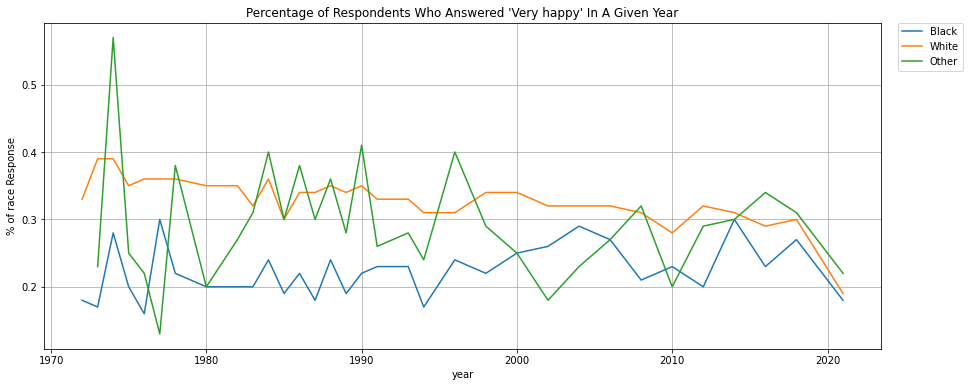

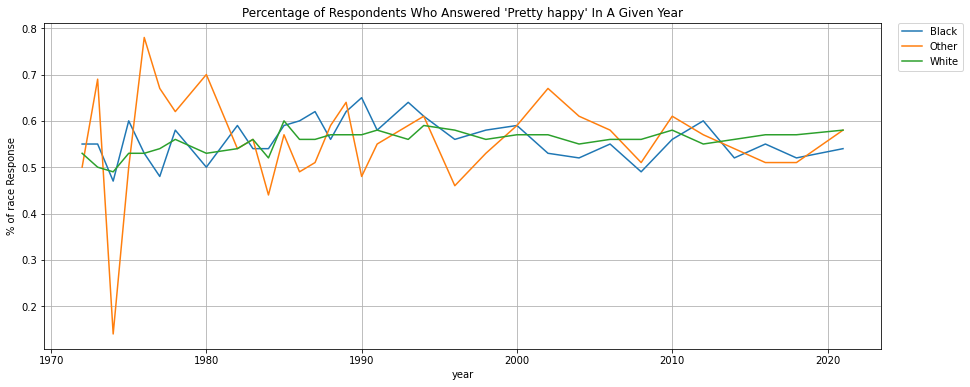

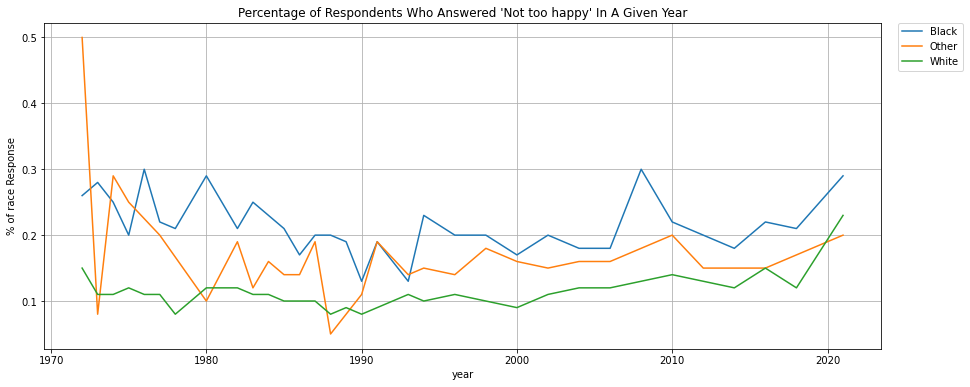

In [ ]:
time_series_feature_plot('race')

#Happiness Per Region
It appears the trends for happiness are similar across regions.

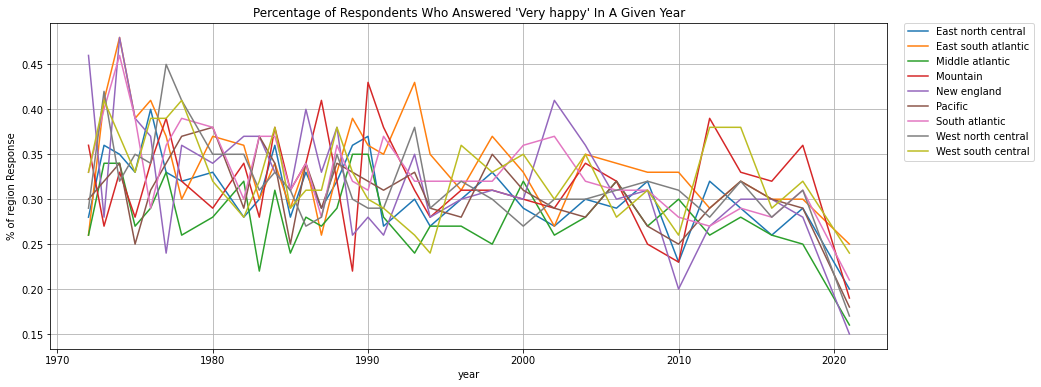

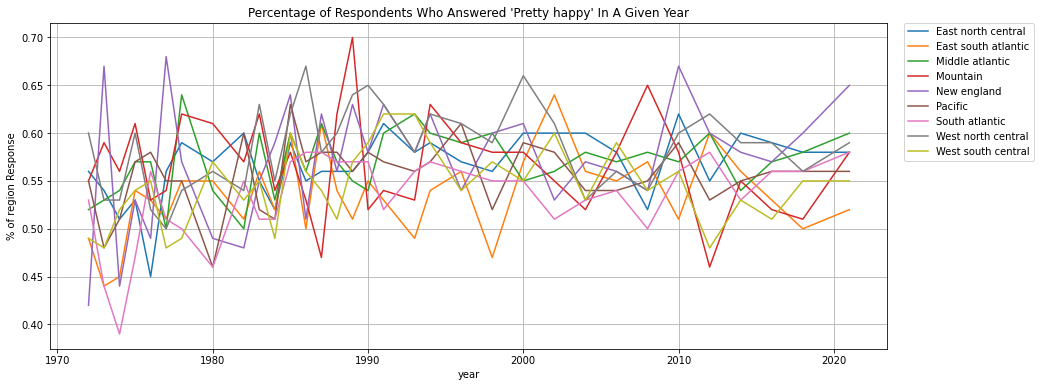

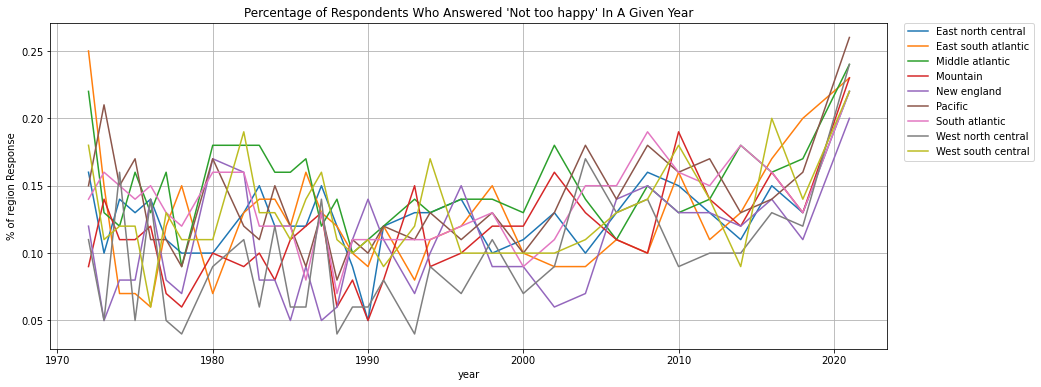

In [ ]:
time_series_feature_plot('region')

# Happiness For Those Dealing With Drug Addiction
It appears those who indicate they are dealing with too much drug addiction report themselves as 'Not too happy' more often than other groups.

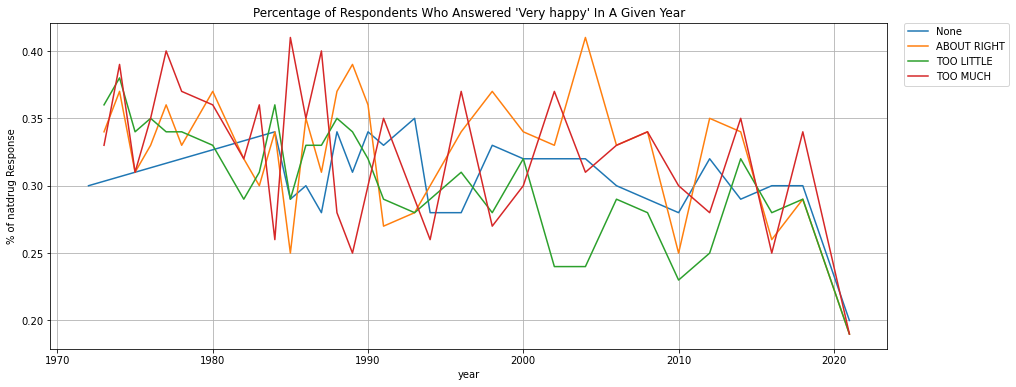

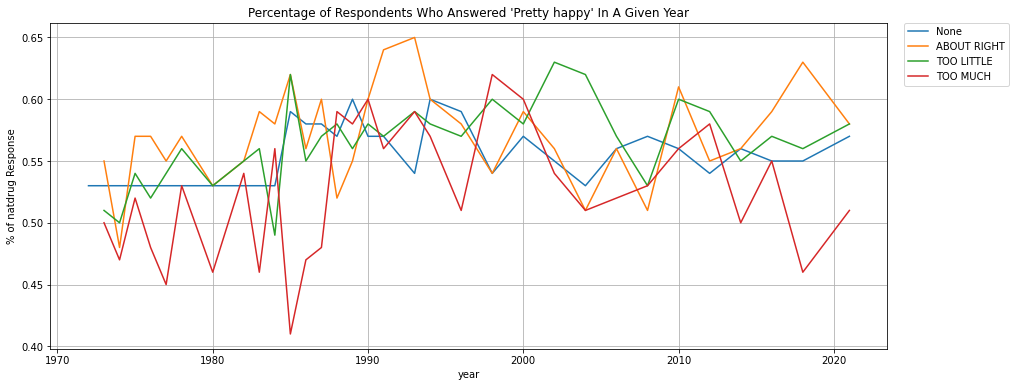

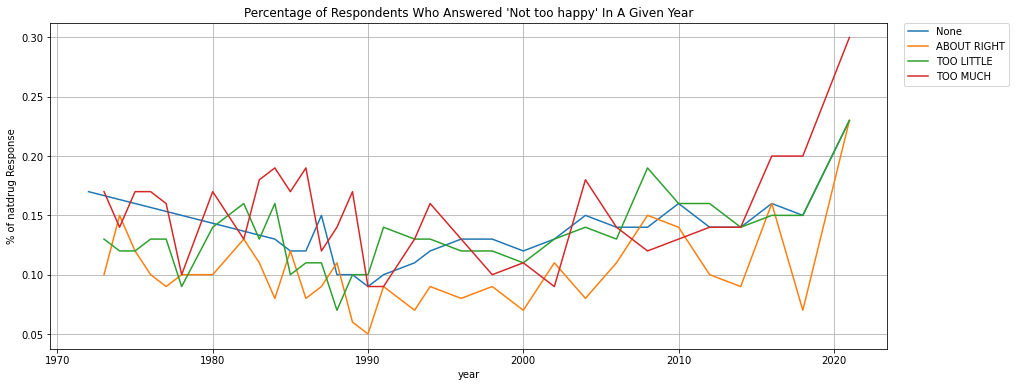

In [ ]:
time_series_feature_plot('natdrug')